In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part I Basic features from listings

In [56]:
#import data
df1 = pd.read_csv('NYC_listings_202203.csv')
df1['Quarter']=1
df2 = pd.read_csv('NYC_listings_202206.csv')
df2['Quarter']=2
df3 = pd.read_csv('NYC_listings_202109.csv')
df3['Quarter']=3
df4 = pd.read_csv('NYC_listings_202112.csv')
df4['Quarter']=4
nyc_data=pd.concat([df1, df2, df3, df4])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Quarter
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.32,3,334,0,NaN,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN,1
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,201,1,NaN,1
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2022-02-18,3.33,1,154,46,NaN,1
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.77,1,0,0,NaN,1


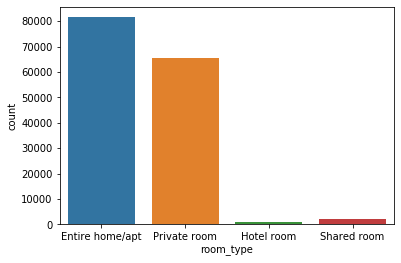

In [61]:
ax = sns.countplot(x="room_type", data=nyc_data)  

In [6]:
nyc_data.isnull().sum()

id                                     0
name                                  54
host_id                                0
host_name                            298
neighbourhood_group                    0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        35723
reviews_per_month                  35723
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           150235
Quarter                                0
dtype: int64

Text(0.5, 1.0, 'Price Distribution')

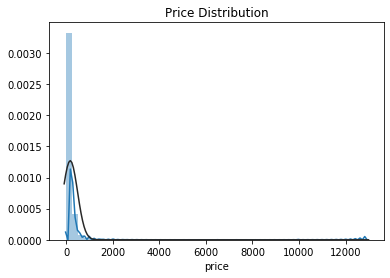

In [7]:
from scipy.stats import norm
sns.distplot(nyc_data['price'], fit=norm)
plt.title("Price Distribution")
# very skewed 

In [8]:
#log transformation
nyc_data['price_log'] = np.log(nyc_data.price+1)

Text(0.5, 1.0, 'Price Distribution(Log)')

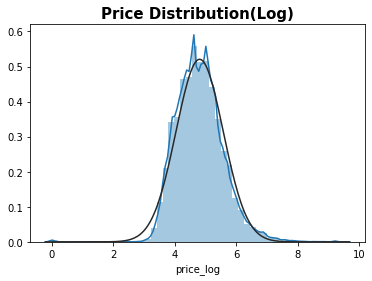

In [9]:
sns.distplot(nyc_data['price_log'], fit=norm)
plt.title("Price Distribution(Log)",size=15, weight='bold')

In [10]:
nyc_df = nyc_data.drop(columns=['name','id' ,'host_id','host_name','last_review','price','license'])
nyc_df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 35723
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
Quarter                               0
price_log                             0
dtype: int64

In [11]:
#fill nan with mean for reviews_per_month
nyc_df['reviews_per_month'].fillna(nyc_df['reviews_per_month'].mean(), inplace=True)
nyc_df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
Quarter                           0
price_log                         0
dtype: int64

In [12]:
corr=nyc_df.corr(method='pearson')
corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter,price_log
latitude,1.000000,0.054106,0.034251,-0.044112,-0.029360,0.071173,0.003078,-0.044873,0.003103,0.037522
longitude,0.054106,1.000000,-0.090627,0.057883,0.060161,-0.064983,0.101372,0.058232,-0.020473,-0.262788
minimum_nights,0.034251,-0.090627,1.000000,-0.142382,-0.135987,0.087464,-0.034833,-0.196726,0.022710,-0.070126
number_of_reviews,-0.044112,0.057883,-0.142382,1.000000,0.329583,-0.103943,0.098389,0.583250,-0.015998,-0.017080
reviews_per_month,-0.029360,0.060161,-0.135987,0.329583,1.000000,-0.001567,0.126116,0.587209,0.069040,0.028777
calculated_host_listings_count,0.071173,-0.064983,0.087464,-0.103943,-0.001567,1.000000,0.186644,-0.044776,0.013158,0.016196
availability_365,0.003078,0.101372,-0.034833,0.098389,0.126116,0.186644,1.000000,0.131279,0.016346,0.135438
number_of_reviews_ltm,-0.044873,0.058232,-0.196726,0.583250,0.587209,-0.044776,0.131279,1.000000,-0.043189,0.040305
Quarter,0.003103,-0.020473,0.022710,-0.015998,0.069040,0.013158,0.016346,-0.043189,1.000000,-0.005956
price_log,0.037522,-0.262788,-0.070126,-0.017080,0.028777,0.016196,0.135438,0.040305,-0.005956,1.000000


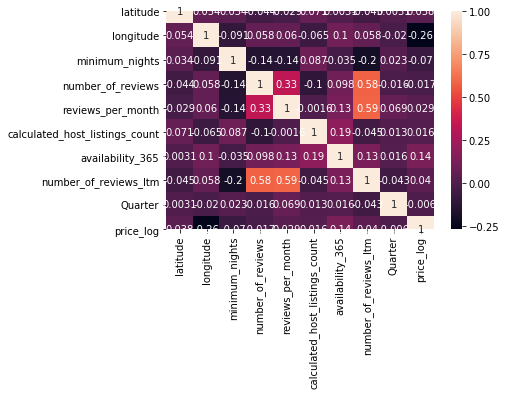

In [13]:
ax = sns.heatmap(corr,annot=True)


In [17]:
#convert category data into series
nyc_df['neighbourhood_group']= nyc_df['neighbourhood_group'].astype("category").cat.codes
nyc_df['neighbourhood'] = nyc_df['neighbourhood'].astype("category").cat.codes
nyc_df['room_type'] = nyc_df['room_type'].astype("category").cat.codes
nyc_df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter,price_log
0,2,144,40.753560,-73.985590,0,30,48,0.320000,3,334,0,1,5.017280
1,1,12,40.685350,-73.955120,2,30,50,0.320000,2,365,0,1,4.110874
2,1,213,40.662650,-73.994540,0,5,2,0.020000,1,201,1,1,5.620401
3,2,144,40.764570,-73.983170,2,2,520,3.330000,1,154,46,1,4.234107
4,2,225,40.803800,-73.967510,2,2,118,0.770000,1,0,0,1,4.330733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,4,177,40.632222,-74.136715,2,1,0,1.345447,6,359,0,4,4.382027
38273,4,177,40.630502,-74.136142,2,1,0,1.345447,6,359,0,4,4.343805
38274,2,144,40.753887,-73.980536,2,1,0,1.345447,13,11,0,4,4.762174
38275,2,144,40.755569,-73.981976,2,1,0,1.345447,13,3,0,4,4.672829


In [18]:
X= nyc_df.iloc[:,:-1]
y=nyc_df.iloc[:,-1]

In [19]:
X

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Quarter
0,2,144,40.753560,-73.985590,0,30,48,0.320000,3,334,0,1
1,1,12,40.685350,-73.955120,2,30,50,0.320000,2,365,0,1
2,1,213,40.662650,-73.994540,0,5,2,0.020000,1,201,1,1
3,2,144,40.764570,-73.983170,2,2,520,3.330000,1,154,46,1
4,2,225,40.803800,-73.967510,2,2,118,0.770000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38272,4,177,40.632222,-74.136715,2,1,0,1.345447,6,359,0,4
38273,4,177,40.630502,-74.136142,2,1,0,1.345447,6,359,0,4
38274,2,144,40.753887,-73.980536,2,1,0,1.345447,13,11,0,4
38275,2,144,40.755569,-73.981976,2,1,0,1.345447,13,3,0,4


f, axes = plt.subplots(3, 2, figsize=(15, 20))
sns.residplot(X.iloc[:,2],y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(X.iloc[:,3],y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(X.iloc[:,5],y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(X.iloc[:,6],y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(X.iloc[:,7],y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(X.iloc[:,8],y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.setp(axes, yticks=[])
plt.tight_layout()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
scaler = StandardScaler()
X_t = scaler.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_t,y,test_size=0.2, random_state=42)

In [22]:
## liner regression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
coeff_df_lr = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'],ascending=False)
coeff_df_lr

,Coefficient
availability_365,0.120302
neighbourhood_group,0.037103
latitude,0.037031
neighbourhood,0.036026
number_of_reviews_ltm,0.021175
reviews_per_month,0.013703
Quarter,-0.003677
calculated_host_listings_count,-0.024622
number_of_reviews,-0.048942
minimum_nights,-0.068314


In [24]:
pred_lr = lin_reg.predict(X_test)

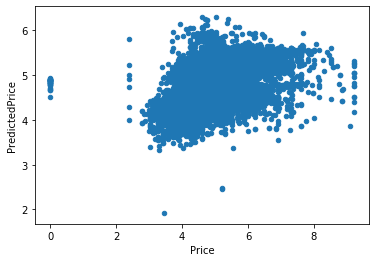

In [25]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': pred_lr}).plot.scatter(x='Price', y='PredictedPrice')

In [26]:
#Lasso Regression 
lasso = Lasso()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_lasso = GridSearchCV(estimator=lasso, scoring='neg_mean_squared_error', param_grid=grid, cv= 5)
CV_lasso.fit(X_train, y_train)
CV_lasso.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17785.513683462457, tolerance: 5.622061687024271
  positive)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_desce

{'alpha': 0.0}

In [27]:
# Ridge Regression
ridge = Ridge()
grid = { 
    'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])
}
CV_ridge = GridSearchCV(estimator=ridge, scoring='neg_mean_squared_error',param_grid=grid, cv= 5)
CV_ridge.fit(X_train, y_train)
CV_ridge.best_params_

{'alpha': 1.0}

In [28]:
#random forest
grid = { 
    'max_depth' : [3,4,5,6,7]
}
## show start time

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
CV_rfr.best_params_

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

{'max_depth': 7}

In [49]:
#prediction

##Linear Regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)
lr_pred_train= lin_reg.predict(X_train)
lr_pred_test= lin_reg.predict(X_test)

#Lasso 
lasso = Lasso(alpha = 0)
lasso.fit(X_train, y_train)
lasso_pred_train= lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)  
ridge_pred_train= ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train, y_train) 
rdf_pred_train= rdf.predict(X_train)
rdf_pred_test = rdf.predict(X_test) 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22336.679266903266, tolerance: 7.04092004378813
  positive)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
important_features_dict = {}
for idx, val in enumerate(rdf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(i,X.columns[i],important_features_dict[i])

4 room_type 0.580745752421531
3 longitude 0.15583312691883305
8 calculated_host_listings_count 0.06997242222729777
2 latitude 0.06506594560368122
9 availability_365 0.04980829067193756
5 minimum_nights 0.04680298875960786
7 reviews_per_month 0.009510708108729438
6 number_of_reviews 0.008638226963244912
1 neighbourhood 0.007262343800613546
10 number_of_reviews_ltm 0.004923999905726219
11 Quarter 0.0009893361901485394
0 neighbourhood_group 0.0004468584286489858


In [39]:
def print_evaluate(Model, tt, Price, PredictedPrice):  
    mae = metrics.mean_absolute_error(Price, PredictedPrice)
    mse = metrics.mean_squared_error(Price, PredictedPrice)
    rmse = np.sqrt(metrics.mean_squared_error(Price, PredictedPrice))
    r2_square = metrics.r2_score(Price, PredictedPrice)
    print(Model+' '+tt)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [33]:
print_evaluate('Linear_Regression', 'test', y_test,lr_pred_test)
print_evaluate('Linear_Regression', 'train', y_train,lr_pred_train)

print_evaluate('Lasso', 'test',y_test, lasso_pred_test)
print_evaluate('Lasso', 'train',y_train, lasso_pred_train)

print_evaluate('Ridge', 'test',y_test, ridge_pred_test)
print_evaluate('Ridge', 'train',y_train, ridge_pred_train)

print_evaluate('Radnom Forest', 'test',y_test, rdf_pred_test)
print_evaluate('Radnom Forest', 'train',y_train, rdf_pred_train)

Linear_Regression test
MAE: 0.43822728999736815
MSE: 0.3799429645726343
RMSE: 0.6163951367204598
R2 Square 0.3572984052586903
__________________________________
Linear_Regression train
MAE: 0.4373029037649969
MSE: 0.37168329451050447
RMSE: 0.6096583424431298
R2 Square 0.3655181672852579
__________________________________
Lasso test
MAE: 0.4382272899973681
MSE: 0.3799429645726343
RMSE: 0.6163951367204598
R2 Square 0.3572984052586903
__________________________________
Lasso train
MAE: 0.4373029037649967
MSE: 0.3716832945105044
RMSE: 0.6096583424431297
R2 Square 0.365518167285258
__________________________________
Ridge test
MAE: 0.43822730693642264
MSE: 0.3799429470824476
RMSE: 0.6163951225329801
R2 Square 0.3572984348446333
__________________________________
Ridge train
MAE: 0.437302967931395
MSE: 0.37168329452432236
RMSE: 0.6096583424544623
R2 Square 0.36551816726166997
__________________________________
Radnom Forest test
MAE: 0.37257239619957094
MSE: 0.27349815370497266
RMSE: 0.52297

In [34]:
#polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

In [40]:
#prediction

##Linear Regression
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train_p, y_train)
lr_pred= lin_reg.predict(X_test_p)

#Lasso 
lasso = Lasso(alpha = 0)
lasso.fit(X_train_p, y_train)
lasso_pred = lasso.predict(X_test_p) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train_p, y_train)             
ridge_pred = ridge.predict(X_test_p) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train_p, y_train) 
rdf_pred= rdf.predict(X_test_p)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20611.933827934357, tolerance: 7.04092004378813
  positive)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
print_evaluate('Linear_Regression', 'test', y_test,lr_pred)
print_evaluate('Lasso', 'test',y_test, lasso_pred)
print_evaluate('Ridge', 'test',y_test, ridge_pred)
print_evaluate('Radnom Forest', 'test',y_test, rdf_pred)

Linear_Regression test
MAE: 0.4174345828896624
MSE: 0.3521723818805783
RMSE: 0.5934411359861889
R2 Square 0.4042743975715253
__________________________________
Lasso test
MAE: 0.4174345828288402
MSE: 0.35217238163094383
RMSE: 0.593441135775861
R2 Square 0.4042743979938005
__________________________________
Ridge test
MAE: 0.41743444788800305
MSE: 0.3521721186119822
RMSE: 0.5934409141708905
R2 Square 0.40427484290980586
__________________________________
Radnom Forest test
MAE: 0.36916682359325337
MSE: 0.266672545796355
RMSE: 0.516403471905791
R2 Square 0.5489036870314854
__________________________________
